# US Accidents EDA

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
plt.style.use( 'fivethirtyeight')


## US Accidents Dataset
* This is a countrywide car accident dataset, which covers 49 states of the USA.
### Content
* This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2021 for the Contiguous United States.
### Inspiration
* US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful to study the impact of COVID-19 on traffic behavior and accidents.

### Data preparation and cleaning

In [3]:
# Download the dataset

import opendatasets as od
od.download("https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kiransonkamble
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 269M/269M [01:29<00:00, 3.16MB/s]


In [4]:
# Load the dataset using pandas

df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# Look some information and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

See the number of columns which are numeric, bool and object datatype.

In [9]:
# numeric columns
df_num = df.select_dtypes(include='number')
len(df_num.columns),df_num.columns 

(14,
 Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
        'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)'],
       dtype='object'))

In [10]:
df_bool = df.select_dtypes(include='bool')
len(df_bool.columns), df_bool.columns

(13,
 Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
        'Traffic_Signal', 'Turning_Loop'],
       dtype='object'))

In [11]:
df_object = df.select_dtypes(include='object')
len(df_object.columns), df_object.columns

(20,
 Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
        'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
        'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'))

object     20
float64    13
bool       13
int64       1
dtype: int64


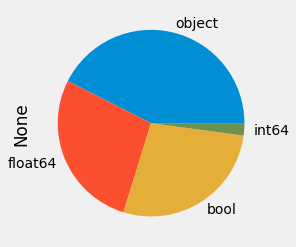

In [12]:
#Total Count of each data types


print(df.dtypes.value_counts())
df.dtypes.value_counts().plot.pie() 

# Graphical Representation for Data Types.
plt.show()


In [13]:
# Description of numerical datatype
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [14]:
# all the missing values column wise
miss_per = df.isna().sum().sort_values(ascending=False)*100/len(df)
miss_per

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

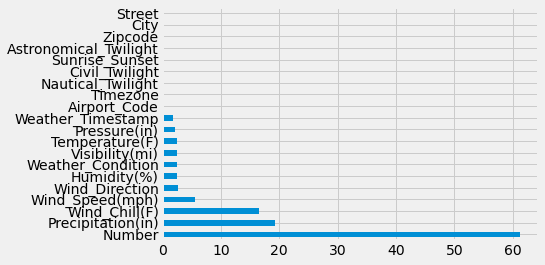

In [51]:
# print the missing values
miss_per_15 = miss_per[miss_per>0]
miss_per_15.plot.barh()

In [16]:
# removing the columns which have missing >25%
miss_per_25 = miss_per[miss_per>25]
miss_per_25_col = miss_per_25.index
df.drop(miss_per_25_col,axis=1,inplace=True)

# after removal of column
df.isna().sum().sort_values(ascending=False)*100/len(df)

Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

## Exploratory analysis and Visualization

##### Explore the cities of USA

This information is correct as per Google.
* The U.S. is a country of 50 states covering a vast swath of North America, with Alaska in the northwest and Hawaii extending the nation’s presence into the Pacific Ocean. 
* Major Atlantic Coast cities are New York.
* Capital Washington, DC.
* Midwestern metropolis Chicago is known for influential architecture.
* os Angeles' Hollywood is famed for filmmaking.

If possible look for external data to validate your result.

Top 20 states where highest accidents happend

<AxesSubplot:>

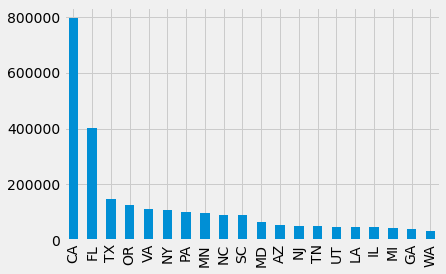

In [17]:
top_state_5 = df['State'].value_counts().sort_values(ascending=False).head(20)
top_state_5.plot.bar()

Top 20 states where lowest accidents happend

<AxesSubplot:>

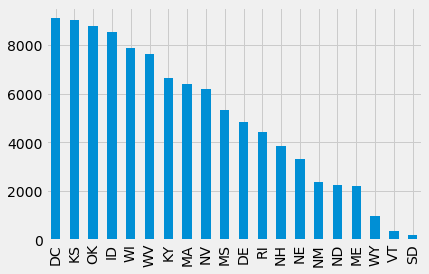

In [18]:
low_state_5 = df['State'].value_counts().sort_values(ascending=False).tail(20)
low_state_5.plot.bar()

In [19]:
gp_severity =df.groupby('State')
gp_severity['City'].value_counts().sort_values(ascending=False).head(100)

State  City       
FL     Miami          106896
CA     Los Angeles     68956
FL     Orlando         54654
TX     Dallas          41615
       Houston         39366
                       ...  
CA     Orange           3593
OH     Columbus         3550
UT     Ogden            3542
OR     Bend             3540
MD     Frederick        3524
Name: City, Length: 100, dtype: int64

<AxesSubplot:xlabel='State,City'>

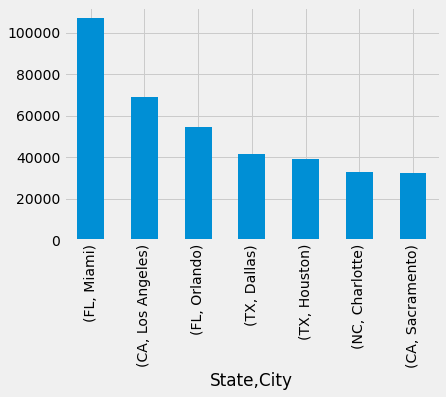

In [20]:
gp_severity =df.groupby('State')
gp_severity['City'].value_counts().sort_values(ascending=False).head(7).plot.bar()

### Start Time column



In [21]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Year'] = pd.DatetimeIndex(df['Start_Time']).year
df['Start_Year'] 

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Year, Length: 2845342, dtype: int64

In [22]:
# at what time most accidents happend in a day
df['Start_Hour'] = pd.DatetimeIndex(df['Start_Time']).hour

Rechck this???????

<AxesSubplot:xlabel='Start_Hour', ylabel='Count'>

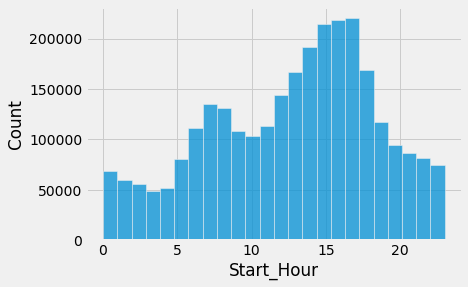

In [23]:
sns.histplot(df['Start_Hour'],bins=24,kde=False)

<AxesSubplot:xlabel='Start_Hour'>

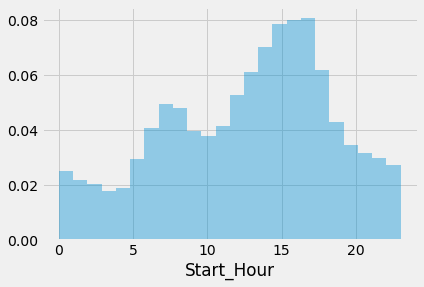

In [24]:
sns.distplot(df['Start_Hour'],bins=24,kde=False,norm_hist=True)

In [25]:
# sns.jointplot(x='Start_Year',y="Start_Hour",data=df,kind="reg",color='gold')

Q:> what time of day accidents mostly happend?
A:: between 3pm to 6pm

Q:> Which days of the week have most accidents?

Q:> which month have the most accidents?

Q:> what is the trend of accindents year over year?

Q:> When is accidents per unit of traffic highest?

Q:> is the distribution of acccidents by hour same on weekends as weekdays?
    

### Lets check the Day of the week

In [26]:
df['Start_day'] = pd.DatetimeIndex(df['Start_Time']).day

<AxesSubplot:xlabel='Start_day', ylabel='Count'>

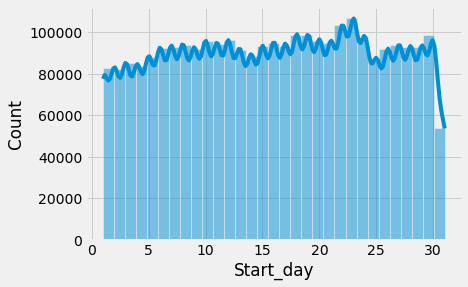

In [27]:
sns.histplot(df['Start_day'],bins=31,kde=True)


In [28]:
df['Start_day_week'] = pd.DatetimeIndex(df['Start_Time']).dayofweek

In [29]:
# df['Start_week_month'] = pd.DatetimeIndex(df['Start_Time']).weekofmonth

<AxesSubplot:xlabel='Start_day_week', ylabel='Count'>

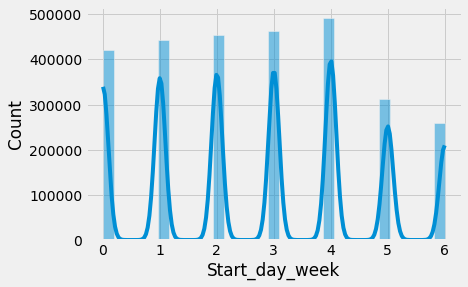

In [30]:
sns.histplot(df['Start_day_week'],bins=31,kde=True)


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

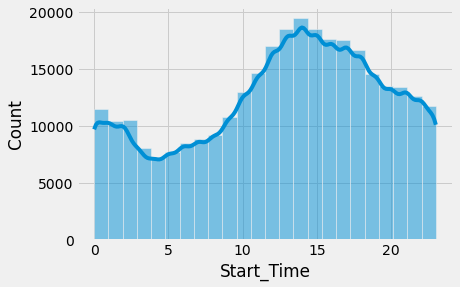

In [31]:

sat = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.histplot(sat.dt.hour,bins=24,kde=True)


# 12pm to 7pm

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

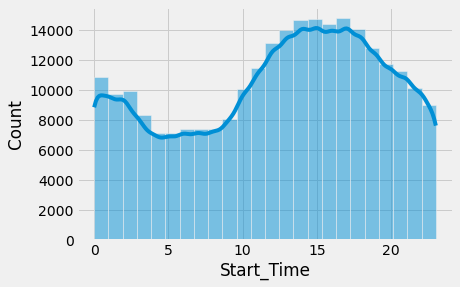

In [32]:

sunday = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday.dt.hour,bins=24,kde=True)




<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

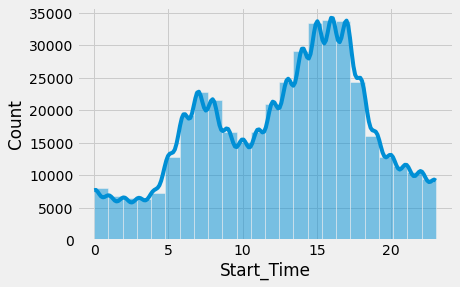

In [33]:

monday = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.histplot(monday.dt.hour,bins=24,kde=True)
# # 3pm to 6pm

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

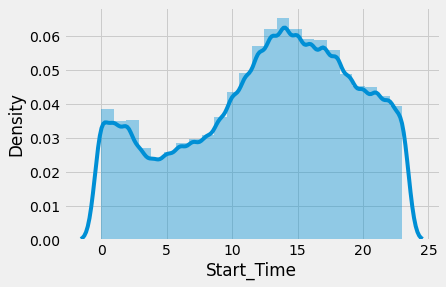

In [34]:

wed = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.distplot(wed.dt.hour,bins=24)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

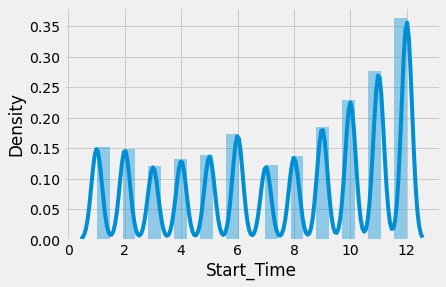

In [35]:
sns.distplot(df.Start_Time.dt.month,bins=24)

# explain the trend of the accidents mont wise

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

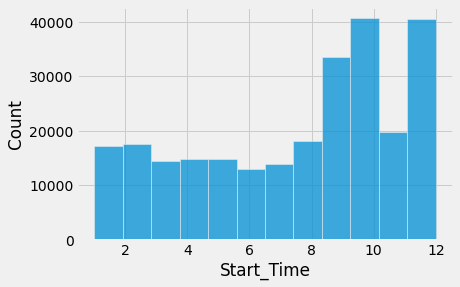

In [36]:
# it gives all the data of year=2019 only

year_2019 = df[df.Start_Time.dt.year==2019]
sns.histplot(year_2019.Start_Time.dt.month,bins=12)


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

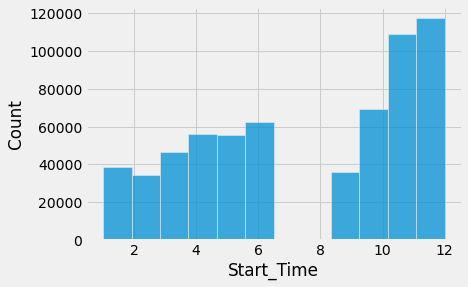

In [37]:
# it gives all the data of year=2020 only

year_2020 = df[df.Start_Time.dt.year==2020]
sns.histplot(year_2020.Start_Time.dt.month,bins=12)

# U.S. coronavirus deaths rose by over 25000 and cases doubled in 19 states during the month july and Aug , 

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

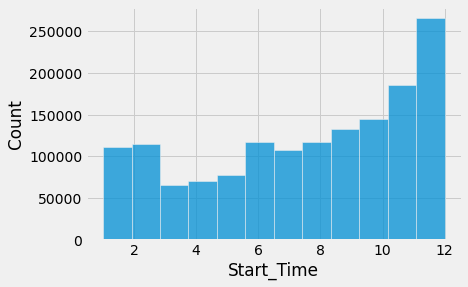

In [38]:
# it gives all the data of year=2021 only

year_2021 = df[df.Start_Time.dt.year==2021]
sns.histplot(year_2021.Start_Time.dt.month,bins=12)


Q:> How many states and major cities data is this?  
A:: This dataset is abouut 49 states only and 11681 major cities.

Q:> Top 7 cities where highest accidents happend


Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
Name: City, dtype: int64

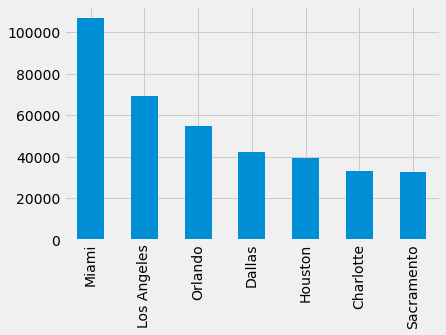

In [39]:
df['City'].value_counts()
top_city_7=df['City'].value_counts().head(7)
top_city_7.plot.bar()
df['City'].value_counts().head(7)

Q:> Top 7 whare lowest accidents happend

<AxesSubplot:>

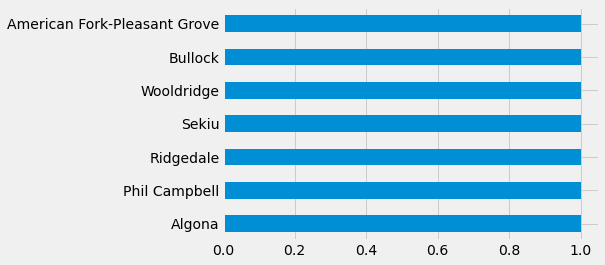

In [40]:
df['City'].value_counts()
top_city_7=df['City'].value_counts().tail(7)
top_city_7.plot.barh()
# df['City'].value_counts().tail(7)

Q:> which cities of the state have most accidets.

### Start Latitude and longitude


In [41]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Hour,Start_day,Start_day_week
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,Night,Night,Night,Night,2016,0,8,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,Night,Night,Night,Night,2016,5,8,0
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,Night,Night,Night,Day,2016,6,8,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,Night,Night,Day,Day,2016,6,8,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,Day,Day,Day,Day,2016,7,8,0


<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

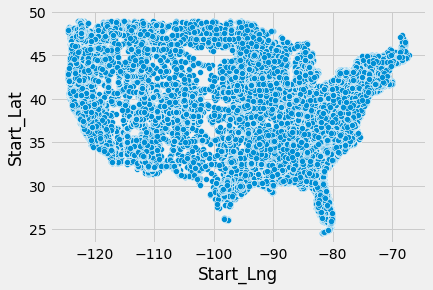

In [42]:
sns.scatterplot(y=df.Start_Lat,x=df.Start_Lng)

In [43]:
df_sample = df.sample(int(0.1*len(df)))
df_sample.shape

(284534, 50)

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

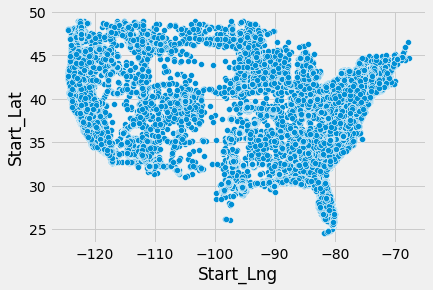

In [44]:
sns.scatterplot(y=df_sample.Start_Lat,x=df_sample.Start_Lng)

Make the map where most accidents happend

In [45]:
df_de = df.sample(int(0.000001*len(df)))
df_de.shape

(2, 50)

In [62]:
df_10 = df.sample(100)
df_10.shape

(100, 50)

In [46]:
for x,y in df_de.iterrows():
    print(y['Start_Lat'],y['Start_Lng'])

33.87628 -118.1291
25.734089 -80.30680799999998


In [63]:
map=folium.Map()
for i ,j in df_10.iterrows():
    # folium.Map(location=[j['Start_Lng'],j['Start_Lat']])
    folium.Marker(location=[j['Start_Lng'],j['Start_Lat']],).add_to(map)
map

In [ ]:
Show the most dangerous road where accidents happens

In [57]:

map =folium.Map(location=[39.172393,-84.492792])
for i,j in df_de.iterrows():
    folium.Marker(location=[j['Start_Lng'],j['Start_Lat']]).add_to(map)
map

In [ ]:
# show the locations where most severe accidents happened 

In [56]:
map = folium.Map()
marker = folium.Marker((df['Start_Lat'][0],df['Start_Lng'][0])).add_to(map)
map

Lets plot heatMAp

In [77]:
df_5per = df.sample(int(0.02*len(df)))
df_5per.shape

(56906, 50)

In [79]:
# need only lat and lang
df_lat_lang = list(zip(df_5per.Start_Lat,df_5per.Start_Lng))

In [86]:
map=folium.Map()
HeatMap(df_lat_lang,name=df_5per.City,min_opacity=0.8,cmap='coolwarm').add_to(map)
map

Top 5 states which have most sever accidents 
* FL 
* CA 
* PA
* VA
* NY

In [50]:
# state = ['AK',"AZ","AR",'CA','CZ','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VT', 'VI', 'VA','WA','WV','WI','WY']

ASK Questions?

1. on an avg when does more Accidents happend?
2. At what tempreature accidents happend?
3. which states have highest and lowest accidents? how about per capita?
4. on an avg when does accidents happend?
5. most dangerous place where most of the accidents happend>
6. in which season highest accidents happend?
7. which states have highest accident case files?
8.   

# Summary and conclusion: